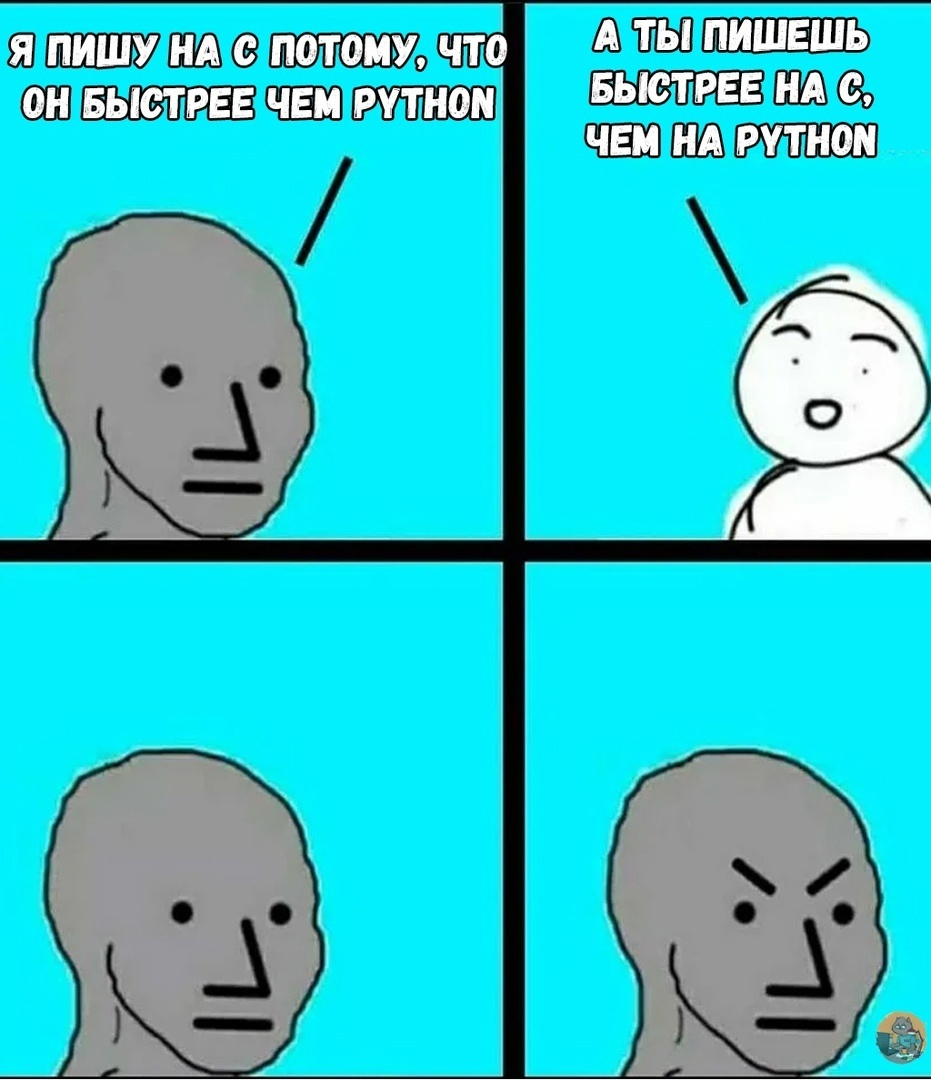

## Ещё немного Scipy  
### **Image manipulation: scipy.ndimage**
Обеспечивает манипулирование n-мерными массивами как изображениями.


### Геометрические преобразования изображений

In [ ]:
# Load some data
import scipy as sp

face = sp.datasets.face(gray=True)

# Apply a variety of transformations
import matplotlib.pyplot as plt

shifted_face = sp.ndimage.shift(face, (50, 50))
shifted_face2 = sp.ndimage.shift(face, (50, 50), mode="nearest")
rotated_face = sp.ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = sp.ndimage.zoom(face, 3)
zoomed_face.shape

plt.figure(figsize=(15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap="gray")
plt.axis("off")

plt.subplot(152)
plt.imshow(shifted_face2, cmap="gray")
plt.axis("off")

plt.subplot(153)
plt.imshow(rotated_face, cmap="gray")
plt.axis("off")

plt.subplot(154)
plt.imshow(cropped_face, cmap="gray")
plt.axis("off")

plt.subplot(155)
plt.imshow(zoomed_face, cmap="gray")
plt.axis("off")

plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.99)

plt.show()

### Фильтрация изображений

In [ ]:
# Load some data
import scipy as sp

face = sp.datasets.face(gray=True)
face = face[:512, -512:]  # crop out square on right

# Apply a variety of filters
import matplotlib.pyplot as plt
import numpy as np

#Generate a noisy face

noisy_face = np.copy(face).astype(float)
rng = np.random.default_rng()
noisy_face += face.std() * 0.5 * rng.standard_normal(face.shape)

#Apply a variety of filters on it
blurred_face = sp.ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = sp.ndimage.median_filter(noisy_face, size=5)
wiener_face = sp.signal.wiener(noisy_face, (5, 5))

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap="gray")
plt.axis("off")
plt.title("noisy")

plt.subplot(142)
plt.imshow(blurred_face, cmap="gray")
plt.axis("off")
plt.title("Gaussian filter")

plt.subplot(143)
plt.imshow(median_face, cmap="gray")
plt.axis("off")
plt.title("median filter")

plt.subplot(144)
plt.imshow(wiener_face, cmap="gray")
plt.title("Wiener filter")
plt.axis("off")

plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.99)

plt.show()

### Математическая морфология  
Математическая морфология вытекает из теории множеств. Она характеризует и преобразует геометрические структуры. Двоичные (черно-белые) изображения, в частности, могут быть преобразованы с использованием этой теории: множества, которые должны быть преобразованы, являются множествами соседних пикселей с ненулевыми значениями. Теория была также распространена на изображения с серыми значениями.

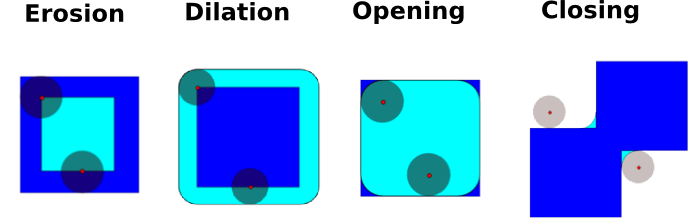

Erosion - эрозия  
Dilation - расширение/растяжение

Математико-морфологические операции используют структурирующий элемент для изменения геометрических структур.

### **Erosion**

In [ ]:
a = np.zeros((7, 7), dtype=int)
a[1:6, 2:5] = 1
a
sp.ndimage.binary_erosion(a).astype(a.dtype)

In [ ]:
# Erosion removes objects smaller than the structure
sp.ndimage.binary_erosion(a, structure=np.ones((4,4))).astype(a.dtype)

### **Dilation**

In [ ]:
a = np.zeros((5, 5))
a[2, 2] = 1
a
sp.ndimage.binary_dilation(a).astype(a.dtype)

### **Opening**

In [ ]:
a = np.zeros((5, 5), dtype=int)
a[1:4, 1:4] = 1
a[4, 4] = 1
a


In [ ]:
# Opening removes small objects
sp.ndimage.binary_opening(a, structure=np.ones((3, 3))).astype(int)

In [ ]:
# Opening can also smooth corners
sp.ndimage.binary_opening(a).astype(int)

### **Closing**
Операция opening удаляет небольшие структуры, а операция closing заполняет небольшие отверстия. Поэтому такие операции можно использовать для «очистки» изображения.

In [ ]:
# Generate some binary data
import numpy as np

np.random.seed(0)
a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25 * np.random.standard_normal(a.shape)
mask = a >= 0.5

# Apply mathematical morphology
import scipy as sp

opened_mask = sp.ndimage.binary_opening(mask)
closed_mask = sp.ndimage.binary_closing(opened_mask)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(a, cmap="gray")
plt.axis("off")
plt.title("a")

plt.subplot(142)
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.title("mask")

plt.subplot(143)
plt.imshow(opened_mask, cmap="gray")
plt.axis("off")
plt.title("opened_mask")

plt.subplot(144)
plt.imshow(closed_mask, cmap="gray")
plt.title("closed_mask")
plt.axis("off")

plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.99)

plt.show()

### Подключенные компоненты и измерения на изображениях  
Сначала создадим красивое синтетическое бинарное изображение.

In [ ]:
x, y = np.indices((100, 100))
sig = (
    np.sin(2 * np.pi * x / 50.0)
    * np.sin(2 * np.pi * y / 50.0)
    * (1 + x * y / 50.0**2) ** 2
)
mask = sig > 1

plt.figure(figsize=(7, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(sig)
plt.axis("off")
plt.title("sig")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.title("mask")
plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.9)

In [ ]:
import scipy as sp

labels, nb = sp.ndimage.label(mask)

plt.figure(figsize=(3.5, 3.5))
plt.imshow(labels)
plt.title("label")
plt.axis("off")

plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.9)

In [ ]:
sl = sp.ndimage.find_objects(labels == 4)
plt.figure(figsize=(3.5, 3.5))
plt.imshow(sig[sl[0]])
plt.title("Cropped connected component")
plt.axis("off")

plt.subplots_adjust(wspace=0.05, left=0.01, bottom=0.01, right=0.99, top=0.9)

plt.show()

## Изображения — это массивы NumPy np.ndarray

| image          | np.ndarray                            |
|----------------|---------------------------------------|
| pixels         | array values: a[2, 3]                 |
| channels       | array dimensions                      |
| image encoding | dtype (np.uint8, np.uint16, np.float) |
| filters        | functions (numpy, skimage, scipy)     |

In [ ]:
import numpy as np
check = np.zeros((8, 8))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
import matplotlib.pyplot as plt
plt.imshow(check, cmap='gray', interpolation='nearest')

## Scikit-image

| color        | Color space conversion.                                                  |
|--------------|--------------------------------------------------------------------------|
| data         | Test images and example data.                                            |
| draw         | Drawing primitives (lines, text, etc.) that operate on NumPy arrays.     |
| exposure     | Image intensity adjustment, e.g., histogram equalization, etc.           |
| feature      | Feature detection and extraction, e.g., texture analysis corners, etc.   |
| filters      | Sharpening, edge finding, rank filters, thresholding, etc.               |
| graph        | Graph-theoretic operations, e.g., shortest paths.                        |
| io           | Reading, saving, and displaying images and video.                        |
| measure      | Measurement of image properties, e.g., region properties and contours.   |
| metrics      | Metrics corresponding to images, e.g. distance metrics, similarity, etc. |
| morphology   | Morphological operations, e.g., opening or skeletonization.              |
| restoration  | Restoration algorithms, e.g., deconvolution algorithms, denoising, etc.  |
| segmentation | Partitioning an image into multiple regions.                             |
| transform    | Geometric and other transforms, e.g., rotation or the Radon transform.   |
| util         | Generic utilities.                                                       |

In [ ]:
import skimage as ski

In [ ]:
image = ski.data.cat()
image

Больше изображений - https://scikit-image.org/docs/stable/api/skimage.data.html#module-skimage.data


In [ ]:
for m in dir(ski): print(m)

In [ ]:
camera = ski.data.camera()
camera.dtype
#camera.shape
camera

In [ ]:
filtered_camera = ski.filters.gaussian(camera, sigma=1)
type(filtered_camera)
#filtered_camera

### Input/output, data types and colorspaces

In [ ]:
ski.io.imsave("cat.png", image)

In [ ]:
cat = ski.io.imread("cat.png")
cat

In [ ]:
logo = ski.io.imread('https://scikit-image.org/_static/img/logo.png')
logo

Массивы изображений ndarrays могут быть представлены либо целыми числами (со знаком или без знака), либо числами с плавающей точкой.

Будьте осторожны с переполнением целочисленных типов данных

In [ ]:
camera = ski.data.camera()
camera.dtype
camera_multiply = 3 * camera
camera_multiply


In [ ]:
camera_float = ski.util.img_as_float(camera)
camera.max(), camera_float.max()

In [ ]:
camera.min(), camera_float.min()

Некоторые процедуры обработки изображений должны работать с массивами с плавающей точкой и, следовательно, могут выводить массив с другим типом и диапазоном данных из входного массива.

В skimage предусмотрены служебные функции для преобразования как dtype, так и диапазона данных в соответствии с соглашениями skimage: util.img_as_float, util.img_as_ubyte и т. д.

**Цветные изображения** имеют форму (N, M, 3) или (N, M, 4) (когда альфа-канал кодирует прозрачность)

In [ ]:
face = sp.datasets.face()
face.shape

Процедуры преобразования между различными цветовыми пространствами (RGB, HSV, LAB и т. д.) доступны в skimage.color: color.rgb2hsv, color.lab2rgb и т. д. Проверьте документацию на предмет ожидаемого dtype (и диапазона данных) входных изображений.

**Упражнение:** Откройте цветное изображение на диске как массив NumPy.

1) Найдите функцию skimage, вычисляющую гистограмму изображения, и постройте гистограмму каждого цветового канала

2) Преобразуйте изображение в оттенки серого и постройте его гистограмму.

### Сопоставление гистограмм
Этот пример демонстрирует функцию сопоставления гистограмм. Он манипулирует пикселями входного изображения так, чтобы его гистограмма совпадала с гистограммой эталонного изображения. Если изображения имеют несколько каналов, сопоставление выполняется независимо для каждого канала, пока количество каналов одинаково во входном изображении и эталоне.

Сопоставление гистограмм можно использовать в качестве легкой нормализации для обработки изображений, такой как сопоставление признаков, особенно в случаях, когда изображения были получены из разных источников или в разных условиях (например, при разном освещении).

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

### Local filters
**Локальные фильтры** заменяют значение пикселей функцией значений соседних пикселей. Функция может быть линейной или нелинейной.

Соседи: квадрат (можно выбрать размер), диск или более сложный структурный элемент.

![kernels[1].png](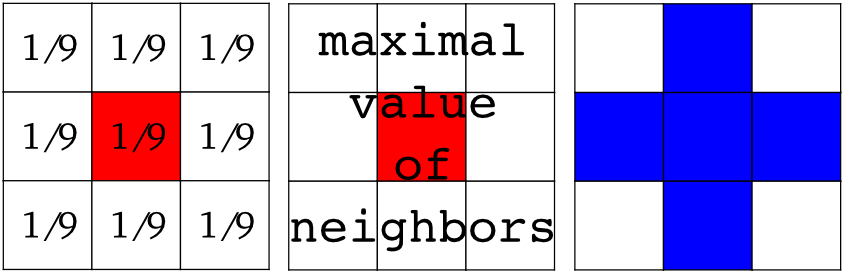)

Пример: горизонтальный фильтер Собеля (Sobel filter) для вычисления горизонтальных градиентов.

![dd41118ccfb100859d0008784e07ef91[1].png](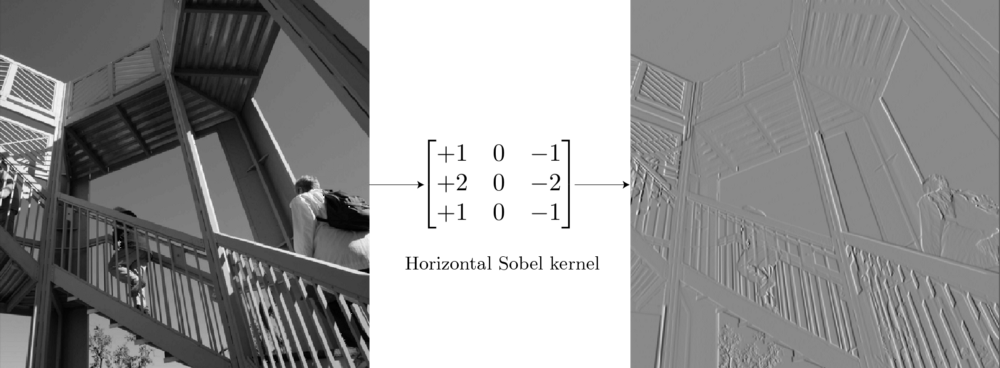)

In [ ]:
text = ski.data.text()
hsobel_text = ski.filters.sobel_h(text)

In [ ]:
plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.imshow(text, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(122)
plt.imshow(hsobel_text, cmap="nipy_spectral", interpolation="nearest")
plt.axis("off")
plt.tight_layout()
plt.show()

### Non-local filters

**Нелокальные фильтры** используют большую область изображения (или все изображение) для преобразования значения одного пикселя

In [ ]:
camera = data.camera()
camera_equalized = exposure.equalize_hist(camera)

plt.figure(figsize=(7, 3))

plt.subplot(121)
plt.imshow(camera, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(122)
plt.imshow(camera_equalized, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.tight_layout()
plt.show()


### Mathematical morphology

Структурирующий элемент по умолчанию:


In [ ]:
# Import structuring elements to make them more easily accessible
from skimage.morphology import disk, diamond
diamond(1)

**Эрозия** = минимальный фильтр. Заменяем значение пикселя на минимальное значение, охватываемое структурирующим элементом.

In [ ]:
a = np.zeros((7,7), dtype=np.uint8)
a[1:6, 2:5] = 1
a

In [ ]:
ski.morphology.binary_erosion(a, diamond(1)).astype(np.uint8)

In [ ]:
#Erosion removes objects smaller than the structure
ski.morphology.binary_erosion(a, diamond(2)).astype(np.uint8)

**Дилатация (Расширение)**: максимальный фильтр

In [ ]:
a = np.zeros((5, 5))
a[2, 2] = 1
a

In [ ]:
ski.morphology.binary_dilation(a, diamond(1)).astype(np.uint8)

**Opening:** erosion + dilation:

In [ ]:
a = np.zeros((5,5), dtype=int)
a[1:4, 1:4] = 1; a[4, 4] = 1
a

In [ ]:
ski.morphology.binary_opening(a, diamond(1)).astype(np.uint8)

**Пример** с фильтрами:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import restoration

coins = data.coins()
gaussian_filter_coins = filters.gaussian(coins, sigma=2)
med_filter_coins = filters.median(coins, np.ones((3, 3)))
tv_filter_coins = restoration.denoise_tv_chambolle(coins, weight=0.1)

plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.imshow(coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("Image")
plt.subplot(142)
plt.imshow(gaussian_filter_coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("Gaussian filter")
plt.subplot(143)
plt.imshow(med_filter_coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("Median filter")
plt.subplot(144)
plt.imshow(tv_filter_coins[10:80, 300:370], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("TV filter")
plt.show()

### Сегментация изображения  
**Сегментация изображения** — это присвоение различных меток разным областям изображения, например, для извлечения пикселей интересующего объекта.  
* **Бинарная сегментация**: передний план + фон

Метод на основе гистограммы: пороговое значение Оцу (Otsu thresholding)
- Метод Оцу — это простой эвристический метод для нахождения порога для отделения переднего плана от фона.

In [ ]:
camera = data.camera()
val = filters.threshold_otsu(camera)

hist, bins_center = exposure.histogram(camera)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(camera, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(132)
plt.imshow(camera < val, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color="k", ls="--")

plt.tight_layout()
plt.show()

Маркировка связанных компонентов дискретного изображения  
* После того, как вы отделили объекты переднего плана, он используется для их отделения друг от друга. Для этого мы можем назначить каждому из них различные целочисленные метки.

In [ ]:
n = 20
l = 256
im = np.zeros((l, l))
rng = np.random.default_rng()
points = l * rng.random((2, n ** 2))
im[(points[0]).astype(int), (points[1]).astype(int)] = 1
im = ski.filters.gaussian(im, sigma=l / (4. * n))
blobs = im > im.mean()

In [ ]:
#Label all connected components:

all_labels = ski.measure.label(blobs)

#Label only foreground connected components:

blobs_labels = ski.measure.label(blobs, background=0)

In [ ]:
plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap="gray")
plt.axis("off")
plt.subplot(132)
plt.imshow(all_labels, cmap="nipy_spectral")
plt.axis("off")
plt.subplot(133)
plt.imshow(blobs_labels, cmap="nipy_spectral")
plt.axis("off")

plt.tight_layout()
plt.show()

* **Методы, основанные на маркерах** (Marker based)  
Если у вас есть маркеры внутри набора регионов, вы можете использовать их для сегментации.  
1) **Watershed segmentation**: 'Водораздел' (skimage.segmentation.watershed()) — это подход, основанный на увеличении области, который заполняет «бассейны» на изображении.

In [ ]:
# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
import scipy as sp
distance = sp.ndimage.distance_transform_edt(image)
peak_idx = ski.feature.peak_local_max(
    distance, footprint=np.ones((3, 3)), labels=image
)
peak_mask = np.zeros_like(distance, dtype=bool)
peak_mask[tuple(peak_idx.T)] = True
markers = ski.morphology.label(peak_mask)
labels_ws = ski.segmentation.watershed(
    -distance, markers, mask=image
)

2) **Random walker segmentation**: Алгоритм случайного блуждания (skimage.segmentation.random_walker()) похож на Watershed, но с более «вероятностным» подходом. Он основан на идее диффузии меток на изображении:

In [ ]:
# Transform markers image so that 0-valued pixels are to
# be labelled, and -1-valued pixels represent background
markers[~image] = -1
labels_rw = ski.segmentation.random_walker(image, markers)

In [ ]:
plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(image, cmap="gray", interpolation="nearest")
plt.axis("off")
plt.title("image")
plt.subplot(142)
plt.imshow(-distance, interpolation="nearest")
plt.axis("off")
plt.title("distance map")
plt.subplot(143)
plt.imshow(labels_ws, cmap="nipy_spectral", interpolation="nearest")
plt.axis("off")
plt.title("watershed segmentation")
plt.subplot(144)
plt.imshow(labels_rw, cmap="nipy_spectral", interpolation="nearest")
plt.axis("off")
plt.title("random walker segmentation")

plt.tight_layout()
plt.show()

### Визуализация и взаимодействие данных  
Некоторые операции обработки изображений:

In [ ]:
coins = ski.data.coins()
mask = coins > ski.filters.threshold_otsu(coins)
clean_border = ski.segmentation.clear_border(mask)

In [ ]:
#Visualize binary result:
plt.figure()
plt.imshow(clean_border, cmap='gray')

In [ ]:
#Visualize contour
plt.figure()
plt.imshow(coins, cmap='gray')
plt.contour(clean_border, [0.5])

In [ ]:
coins_edges = ski.segmentation.mark_boundaries(
    coins, clean_border.astype(int)
)

In [ ]:

plt.figure(figsize=(8, 3.5))
plt.subplot(121)
plt.imshow(clean_border, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(coins_edges)
plt.axis("off")

plt.tight_layout()
plt.show()

### Извлечение признаков для компьютерного зрения

Геометрический или текстурный дескриптор может быть извлечен из изображений для того, чтобы  
1) классифицировать части изображения (например, небо и здания)

2) сопоставить части разных изображений (например, для обнаружения объектов)

и многих других приложений компьютерного зрения

**Пример:** обнаружение углов с помощью детектора Харриса

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7, translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))

coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

plt.gray()
plt.imshow(image, interpolation="nearest")
plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], "+r", markersize=15, mew=5)
plt.plot(coords[:, 1], coords[:, 0], ".b", markersize=7)
plt.axis("off")
plt.show()

## Ещё несколько примеров:

### Строим пирамиду из изображений
Функция **pyramid_gaussian** берет изображение и выдает последовательные изображения, сжатые на постоянный масштабный коэффициент. Пирамиды изображений часто используются, например, для реализации алгоритмов шумоподавления, распознавания текстур и масштабно-инвариантного обнаружения.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian


image = data.astronaut()
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, channel_axis=-1))

Генерация составного изображения для визуализации:  
Для визуализации мы генерируем составное изображение с тем же количеством строк, что и исходное изображение, но со столбцами cols + pyramid[1].shape[1]. Затем у нас есть место для размещения всех изображений с пониженной выборкой справа от оригинала.

In [ ]:
# determine the total number of rows and columns for the composite
composite_rows = max(rows, sum(p.shape[0] for p in pyramid[1:]))
composite_cols = cols + pyramid[1].shape[1]
composite_image = np.zeros((composite_rows, composite_cols, 3), dtype=np.double)

# store the original to the left
composite_image[:rows, :cols, :] = pyramid[0]

# stack all downsampled images in a column to the right of the original
i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row : i_row + n_rows, cols : cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()

### Кусочно-аффинное преобразование

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import PiecewiseAffineTransform, warp
from skimage import data


image = data.astronaut()
rows, cols = image.shape[0], image.shape[1]

src_cols = np.linspace(0, cols, 20)
src_rows = np.linspace(0, rows, 10)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

# add sinusoidal oscillation to row coordinates
dst_rows = src[:, 1] - np.sin(np.linspace(0, 3 * np.pi, src.shape[0])) * 50
dst_cols = src[:, 0]
dst_rows *= 1.5
dst_rows -= 1.5 * 50
dst = np.vstack([dst_cols, dst_rows]).T


tform = PiecewiseAffineTransform()
tform.estimate(src, dst)

out_rows = image.shape[0] - 1.5 * 50
out_cols = cols
out = warp(image, tform, output_shape=(out_rows, out_cols))

fig, ax = plt.subplots()
ax.imshow(out)
ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
ax.axis((0, out_cols, out_rows, 0))
plt.show()

### Типы гомографий
Гомографии — это преобразования евклидова пространства, которые сохраняют выравнивание точек. Конкретные случаи гомографии соответствуют сохранению большего количества свойств, таких как параллельность (аффинное преобразование), форма (подобное преобразование) или расстояния (евклидово преобразование).

Гомографии в двумерном евклидовом пространстве (т. е. для двумерных изображений в оттенках серого или многоканальных изображений) определяются матрицей 3x3. Все типы гомографии можно определить, передав либо матрицу преобразования, либо параметры более простых преобразований (вращение, масштабирование, …), которые составляют полное преобразование.

Различные типы гомографии, доступные в scikit-image, показаны здесь в порядке возрастания сложности (т. е. путем уменьшения количества ограничений). Хотя мы здесь сосредоточены на математических свойствах преобразований, учебник Использование геометрических преобразований объясняет, как использовать такие преобразования для различных задач, таких как деформация изображения или оценка параметров.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage import img_as_float

1) **Евклидово (жесткое) преобразование**  
Евклидово преобразование, также называемое жестким преобразованием, сохраняет евклидово расстояние между парами точек. Его можно описать как вращение вокруг начала координат с последующим переносом.

In [ ]:
tform = transform.EuclideanTransform(rotation=np.pi / 12.0, translation=(100, -20))
print(tform.params)

Теперь применим это преобразование к изображению. Поскольку мы пытаемся реконструировать изображение после преобразования, бесполезно видеть, где координата из входного изображения оказывается в выходном, что и дает нам преобразование. Вместо этого для каждого пикселя (координаты) в выходном изображении мы хотим выяснить, откуда во входном изображении он берется. Поэтому нам нужно использовать обратную функцию tform, а не tform напрямую.

In [ ]:
img = img_as_float(data.chelsea())
tf_img = transform.warp(img, tform.inverse)
fig, ax = plt.subplots()
ax.imshow(tf_img)
_ = ax.set_title('Euclidean transformation')

Для вращения вокруг центра изображения можно составить перенос для изменения начала координат, поворот и, наконец, обратный первому переносу.

In [ ]:
rotation = transform.EuclideanTransform(rotation=np.pi / 3)
shift = transform.EuclideanTransform(translation=-np.array(img.shape[:2]) / 2)
# Compose transforms by multiplying their matrices
matrix = np.linalg.inv(shift.params) @ rotation.params @ shift.params
tform = transform.EuclideanTransform(matrix)
tf_img = transform.warp(img, tform.inverse)
fig, ax = plt.subplots()
_ = ax.imshow(tf_img)

2) **Преобразование подобия**  
Преобразование подобия сохраняет форму объектов. Оно сочетает масштабирование, перемещение и вращение.

In [ ]:
tform = transform.SimilarityTransform(
    scale=0.5, rotation=np.pi / 12, translation=(100, 50)
)
print(tform.params)
tf_img = transform.warp(img, tform.inverse)
fig, ax = plt.subplots()
ax.imshow(tf_img)
_ = ax.set_title('Similarity transformation')

3) **Аффинное преобразование**  
Аффинное преобразование сохраняет линии (следовательно, выравнивание объектов), а также параллельность между линиями. Его можно разложить на преобразование подобия и преобразование сдвига.

In [ ]:
tform = transform.AffineTransform(
    shear=np.pi / 6,
)
print(tform.params)
tf_img = transform.warp(img, tform.inverse)
fig, ax = plt.subplots()
ax.imshow(tf_img)
_ = ax.set_title('Affine transformation')

4) **Проективное преобразование** (гомографии)
Гомография, также называемая проективным преобразованием, сохраняет линии, но не обязательно параллельность.

In [ ]:
matrix = np.array([[1, -0.5, 100], [0.1, 0.9, 50], [0.0015, 0.0015, 1]])
tform = transform.ProjectiveTransform(matrix=matrix)
tf_img = transform.warp(img, tform.inverse)
fig, ax = plt.subplots()
ax.imshow(tf_img)
ax.set_title('Projective transformation')

plt.show()

* Визуализация текста на изображении  
В настоящее время Scikit-image не имеет функции, которая позволяет вам писать текст на изображении. Однако есть довольно простой обходной путь с использованием необязательной зависимости scikit-image matplotlib.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

img = data.cat()

fig = plt.figure()
fig.figimage(img, resize=True)
fig.text(0, 0.99, "I am stefan's cat.", fontsize=32, va="top")
fig.canvas.draw()
annotated_img = np.asarray(fig.canvas.renderer.buffer_rgba())
plt.close(fig)

In [ ]:
fig, ax = plt.subplots()
ax.imshow(annotated_img)
ax.set_axis_off()
ax.set_position([0, 0, 1, 1])
plt.show()

### Распознавание лиц с использованием каскадного классификатора  
В этом примере компьютерного зрения показано, как обнаружить лица на изображении с помощью фреймворка обнаружения объектов на основе машинного обучения.

Во-первых, вам понадобится xml-файл, из которого можно прочитать обученные данные. Фреймворк работает с файлами, обученными с использованием функций Multi-block Local Binary Patterns (см. MB-LBP) и Gentle Adaboost с каскадом внимания. Таким образом, фреймворк обнаружения также будет работать с xml-файлами из OpenCV. Там вы можете найти файлы, которые были обучены обнаруживать кошачьи морды, профильные лица и другие вещи. Но если вы хотите обнаружить фронтальные лица, соответствующий файл уже включен в scikit-image.

Далее вам нужно будет указать параметры для функции detect_multi_scale. Здесь вы можете найти значение каждого из них.

Первый — scale_ratio. Чтобы найти все лица, алгоритм выполняет поиск в нескольких масштабах. Это делается путем изменения размера окна поиска. Наименьший размер окна — это размер окна, который использовался при обучении. Этот размер указан в xml-файле с обученными параметрами. Параметр scale_ratio указывает, на какой коэффициент увеличивается окно поиска на каждом шаге. При увеличении этого параметра время поиска уменьшается, а точность падает. Таким образом, лица на некоторых масштабах могут не быть обнаружены.

step_ratio указывает шаг скользящего окна, который используется для поиска лиц на каждом масштабе изображения. Если этот параметр равен единице, то выполняется поиск всех возможных местоположений. Если параметр больше единицы, например, двух, то окно будет перемещено на два пикселя и не во всех возможных местах будет выполнен поиск лиц. Увеличивая этот параметр, мы можем сократить время работы алгоритма, но при этом также уменьшится точность.

min_size — минимальный размер окна поиска при поиске по масштабу. max_size указывает максимальный размер окна. Если вы знаете размер лиц на изображениях, которые хотите искать, вам следует указать эти параметры как можно точнее, так как вы сможете избежать выполнения дорогостоящих вычислений и, возможно, уменьшить количество ложных обнаружений. Вы можете сэкономить много времени, увеличив параметр min_size, поскольку большая часть времени тратится на поиск в самых маленьких масштабах.

Параметры min_neighbor_number и crossing_score_threshold предназначены для кластеризации избыточных обнаружений одного и того же лица и для фильтрации ложных обнаружений. Настоящие лица обычно имеют много обнаружений вокруг них, а ложные обычно имеют одно обнаружение. Первый алгоритм ищет кластеры: два обнаружения прямоугольника помещаются в один кластер, если оценка пересечения между ними больше, чем crossing_score_threshold. Оценка пересечения вычисляется с использованием уравнения (площадь пересечения) / (коэффициент малого прямоугольника). Описанный критерий пересечения был выбран вместо пересечения, а не объединения, чтобы избежать углового случая, когда маленький прямоугольник внутри большого имеет маленькую оценку пересечения. Затем каждый кластер порогируется с использованием параметра min_neighbor_number, который оставляет кластеры, в которых есть такое же или большее количество обнаружений.

Вам также следует учитывать, что ложные обнаружения неизбежны, и если вы хотите иметь действительно точный детектор, вам придется обучить его самостоятельно с помощью утилиты OpenCV train cascade.

In [ ]:
from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img = data.astronaut()

detected = detector.detect_multi_scale(
    img=img, scale_factor=1.2, step_ratio=1, min_size=(60, 60), max_size=(123, 123)
)

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

for patch in detected:
    ax.axes.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2,
        )
    )

plt.show()

### Visual image comparison  
Сравнение изображений особенно полезно при выполнении задач по обработке изображений, таких как манипуляции с экспозицией, фильтрация и восстановление.

В этом примере показано, как легко сравнить два изображения с помощью различных подходов.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from skimage import data, transform, exposure
from skimage.util import compare_images


img1 = data.coins()
img1_equalized = exposure.equalize_hist(img1)
img2 = transform.rotate(img1, 2)


comp_equalized = compare_images(img1, img1_equalized, method='checkerboard')
diff_rotated = compare_images(img1, img2, method='diff')
blend_rotated = compare_images(img1, img2, method='blend')

* **Шахматная доска**  
Метод шахматной доски предполагает чередование плиток с первого и второго изображений.

In [ ]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img1_equalized, cmap='gray')
ax1.set_title('Equalized')
ax2.imshow(comp_equalized, cmap='gray')
ax2.set_title('Checkerboard comparison')

for a in (ax0, ax1, ax2):
    a.set_axis_off()

fig.tight_layout()

* Diff  
Метод diff вычисляет абсолютную разницу между двумя изображениями.

In [ ]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img2, cmap='gray')
ax1.set_title('Rotated')
ax2.imshow(diff_rotated, cmap='gray')
ax2.set_title('Diff comparison')

for a in (ax0, ax1, ax2):
    a.set_axis_off()

fig.tight_layout()

* Смешивание  
Смешивание — это результат усреднения двух изображений.

In [ ]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img2, cmap='gray')
ax1.set_title('Rotated')
ax2.imshow(blend_rotated, cmap='gray')
ax2.set_title('Blend comparison')

for a in (ax0, ax1, ax2):
    a.set_axis_off()

fig.tight_layout()

plt.show()